In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('D:/ShakthiSai -Keerthana Learnings/AI and Machine Learning/Ensemble Models/kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
data.shape

(21613, 21)

In [4]:
data.columns


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
X = data.iloc[:,3:]
y = data.iloc[:,2]

In [8]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [9]:
y


0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

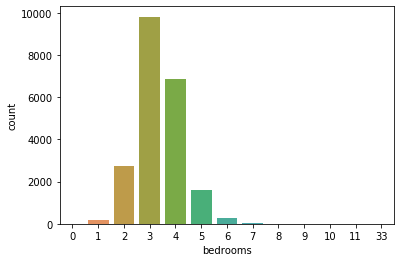

In [10]:
sns.countplot(x='bedrooms',data=data)

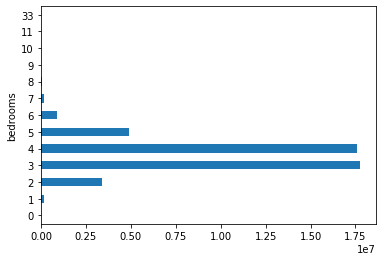

In [11]:
data.groupby('bedrooms')['sqft_living'].sum().plot(kind='barh')

In [24]:
from sklearn.model_selection import train_test_split,GridSearchCV
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

ImportError: cannot import name 'mean_squared_error' from 'sklearn.model_selection' (C:\Users\Vikee\anaconda3\lib\site-packages\sklearn\model_selection\__init__.py)

In [13]:
from sklearn.ensemble import AdaBoostRegressor

In [14]:
ada=AdaBoostRegressor(n_estimators=50, learning_rate=0.2,loss='exponential')

In [15]:
ada.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.2, loss='exponential')

In [16]:
predictions=ada.predict(X_test)

In [29]:
from sklearn import metrics
from sklearn.metrics import r2_score, explained_variance_score,mean_squared_error

In [43]:
print('R2 score (Model Performance):',r2_score(y_test,predictions))    ## also can be written as : ada.score(X_test,y_test)

R2 score (Model Performance): 0.7066934398390827


In [44]:
print('Explained Variance Score:',explained_variance_score(y_test,predictions))

Explained Variance Score: 0.7212076691683826


In [45]:
print('RMSE:',np.sqrt(mean_squared_error(y_test,predictions)))

RMSE: 207003.47060819346


## Hyperparameters tuning

In [ ]:
## to know what are the hyperparameters for adaboost classificaiton :  ada.get_params().keys()

In [46]:
 ada.get_params().keys()

dict_keys(['base_estimator', 'learning_rate', 'loss', 'n_estimators', 'random_state'])

In [21]:
from sklearn.model_selection import GridSearchCV

grid_params = { 'n_estimators': [100,200,300],
               'learning_rate' : [0.01,0.05,0.1,0.3,1],
              'loss' : ['linear', 'square', 'exponential']}

#Building a 3 fold CV GridSearchCV object

grid_object = GridSearchCV(estimator = ada, param_grid = grid_params,scoring='neg_mean_squared_error', cv = 3, n_jobs = -1)




In [ ]:
grid_object.fit(X_train, y_train)


In [23]:
grid_object.best_params_

{'learning_rate': 0.05, 'loss': 'linear', 'n_estimators': 100}